In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

matplotlib.rc('font', family='Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus=False)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [23]:
df_fitness=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [24]:
df_currency=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/환율.csv", encoding='euc-kr')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


<Axes: >

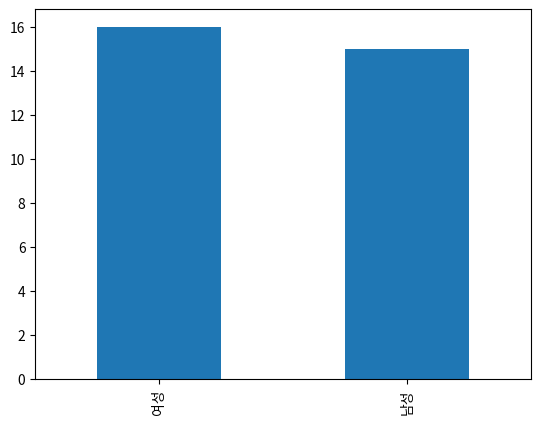

In [27]:
df_count= df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<Axes: >

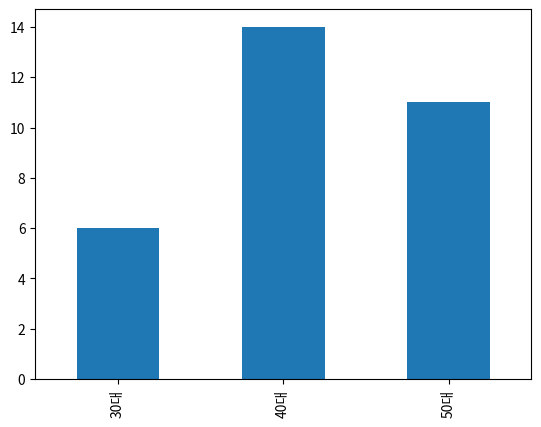

In [28]:
df_count= df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True);
df_count.plot.bar()

<Axes: xlabel='GENDER,AGEGROUP'>

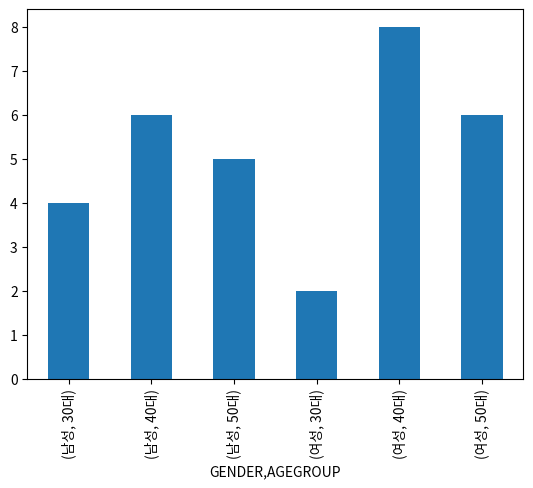

In [29]:
df_group_total= df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_group_total.plot.bar()

<Axes: >

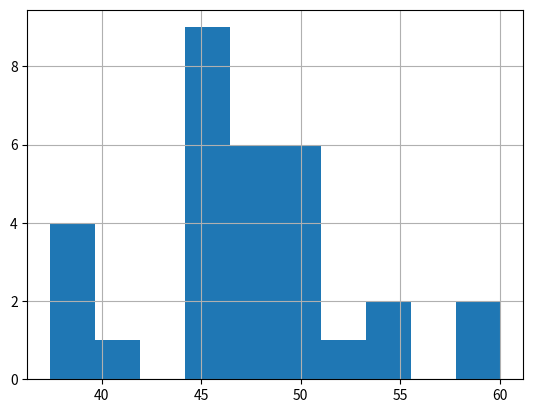

In [30]:
df_fitness=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/FITNESS.csv", encoding='euc-kr')
df_fitness["OXY"].hist()

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>,
        <Axes: title={'center': 'OXY'}>],
       [<Axes: title={'center': 'RUNTIME'}>,
        <Axes: title={'center': 'RUNPULSE'}>,
        <Axes: title={'center': 'RSTPULSE'}>],
       [<Axes: title={'center': 'MAXPULSE'}>, <Axes: >, <Axes: >]],
      dtype=object)

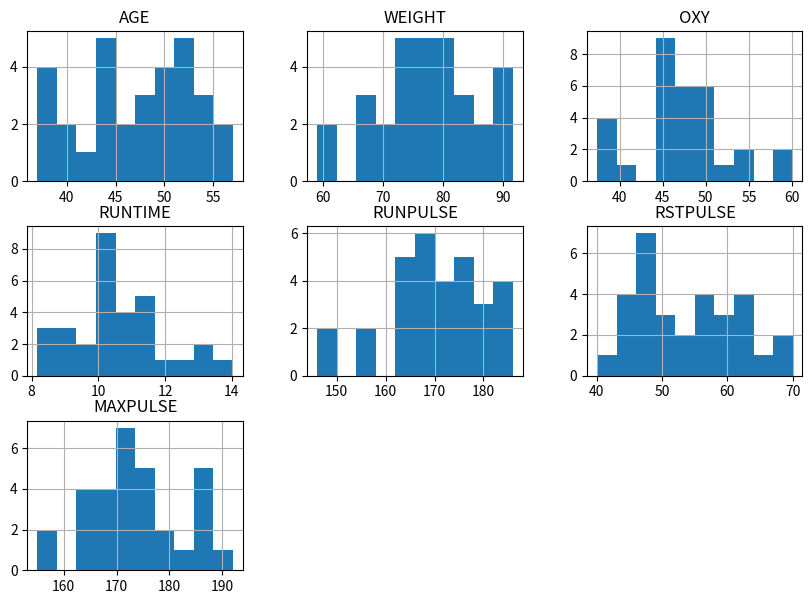

In [31]:
df_fitness.hist(figsize=(10,7))

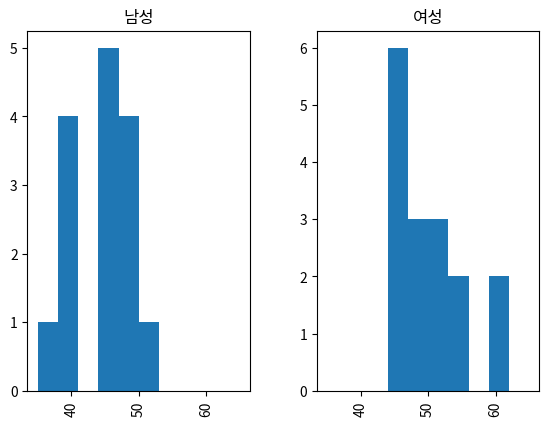

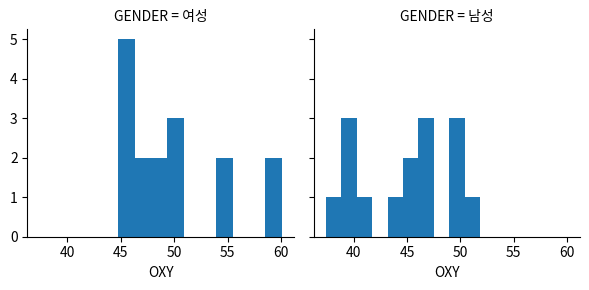

In [36]:
df_fitness.hist(column="OXY", by="GENDER", range=(35,65))
grid= sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist,"OXY")

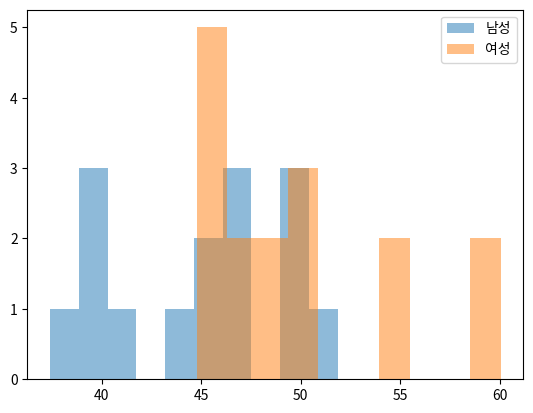

In [38]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label="남성", alpha=0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label="여성", alpha=0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

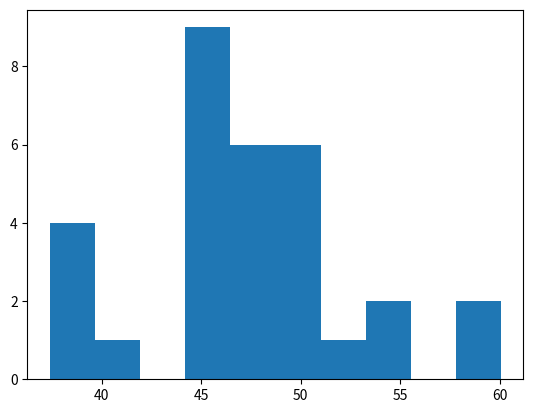

In [39]:
plt.hist(x="OXY",data=df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

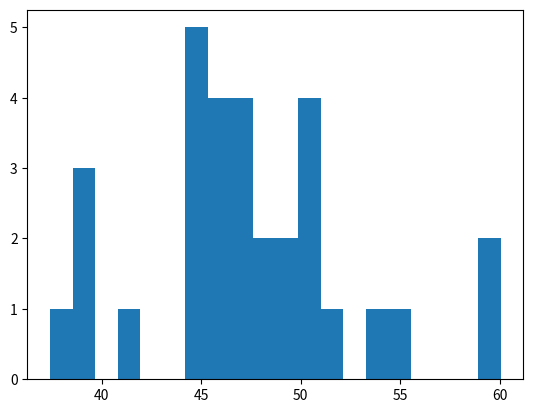

In [40]:
plt.hist(x="OXY", data=df_fitness, bins=20)

<Axes: title={'center': 'OXY'}, xlabel='[GENDER, AGEGROUP]'>

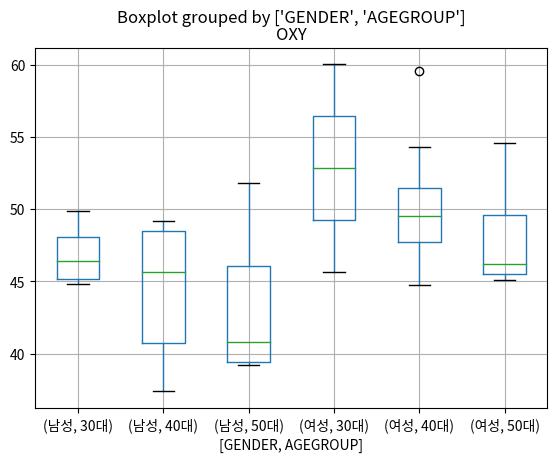

In [41]:
df_fitness.boxplot(column="OXY", by=["GENDER","AGEGROUP"])

<Axes: >

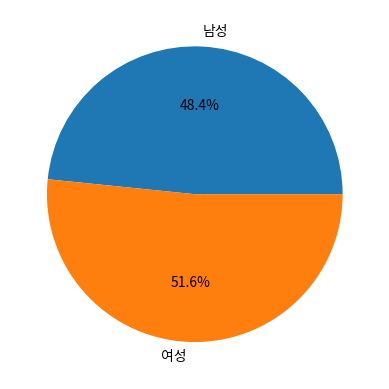

In [43]:
df_count=df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")

<Axes: >

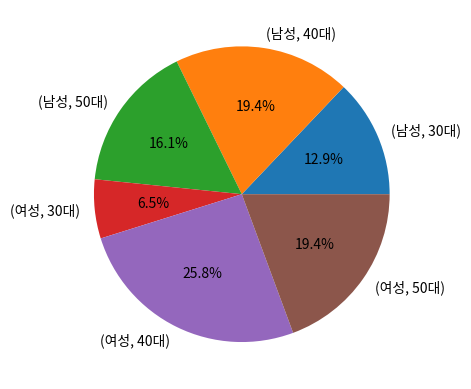

In [46]:
df_count= df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")

<Axes: xlabel='RUNTIME', ylabel='OXY'>

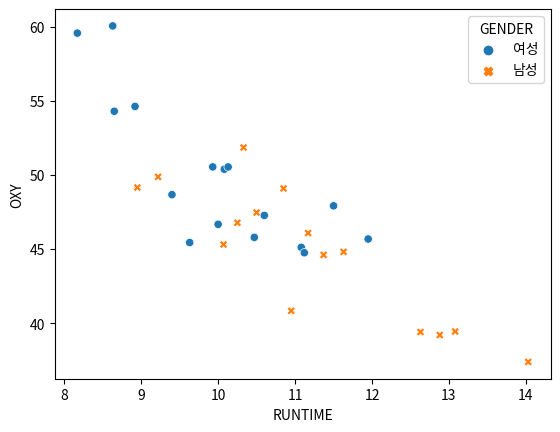

In [48]:
sns.scatterplot(x="RUNTIME", y="OXY", hue="GENDER", style="GENDER",data=df_fitness)

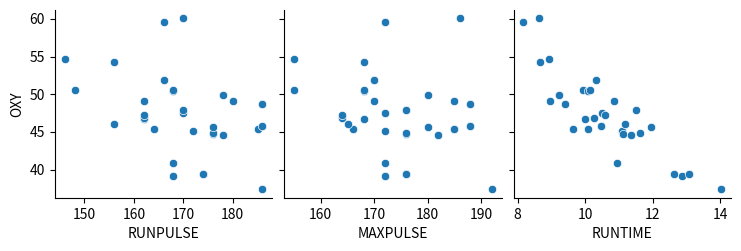

In [49]:
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

In [50]:
df_currency_pivot= df_currency.pivot(index="APPL_DATE", columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
20160101,181.48,976.99,1178.0
20160102,181.48,976.99,1178.0
20160103,181.48,976.99,1178.0
20160104,181.10,992.62,1184.0
20160105,181.94,993.00,1185.0


<Axes: xlabel='APPL_DATE'>

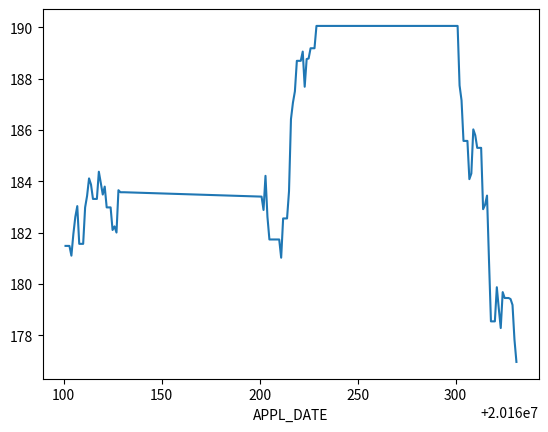

In [51]:
df_currency_pivot["CNY"].plot()

<Axes: xlabel='APPL_DATE'>

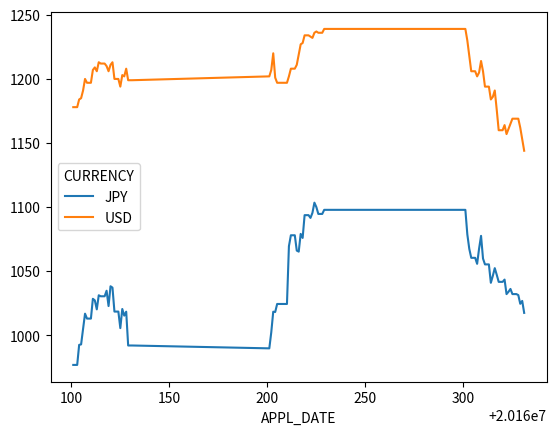

In [53]:
df_currency_pivot[["JPY","USD"]].plot()

<Axes: xlabel='AGEGROUP', ylabel='GENDER'>

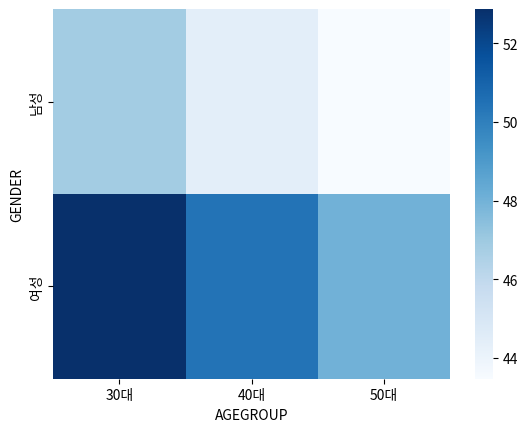

In [55]:
df_agg= df_fitness.groupby(["GENDER","AGEGROUP"], as_index=False)["OXY"].agg("mean")
df_pivot= df_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(df_pivot, cmap="Blues")

<Axes: xlabel='RUNTIME', ylabel='OXY'>

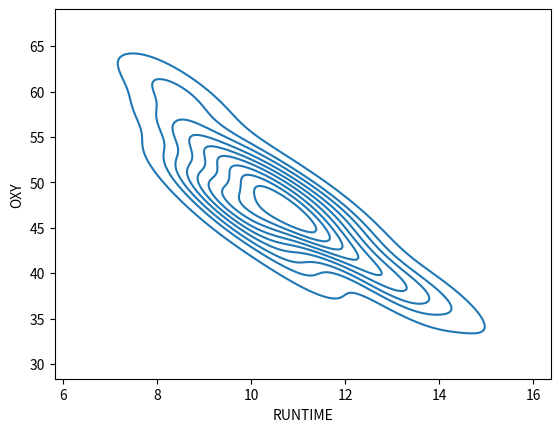

In [56]:
sns.kdeplot(data=df_fitness, x="RUNTIME", y="OXY", shape=False)

<Axes: >

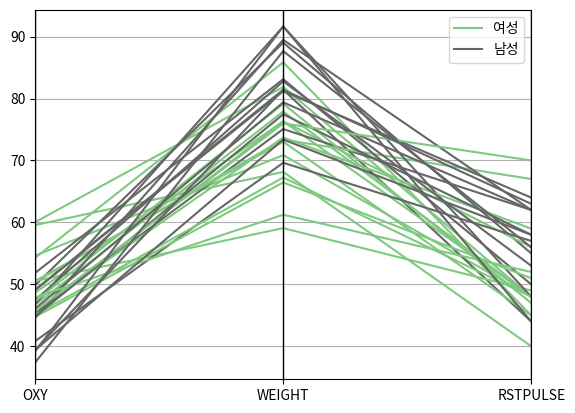

In [59]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY","WEIGHT","RSTPULSE"], colormap="Accent")

Text(677.3926767676767, 0.5, '혈당 산소 요구량')

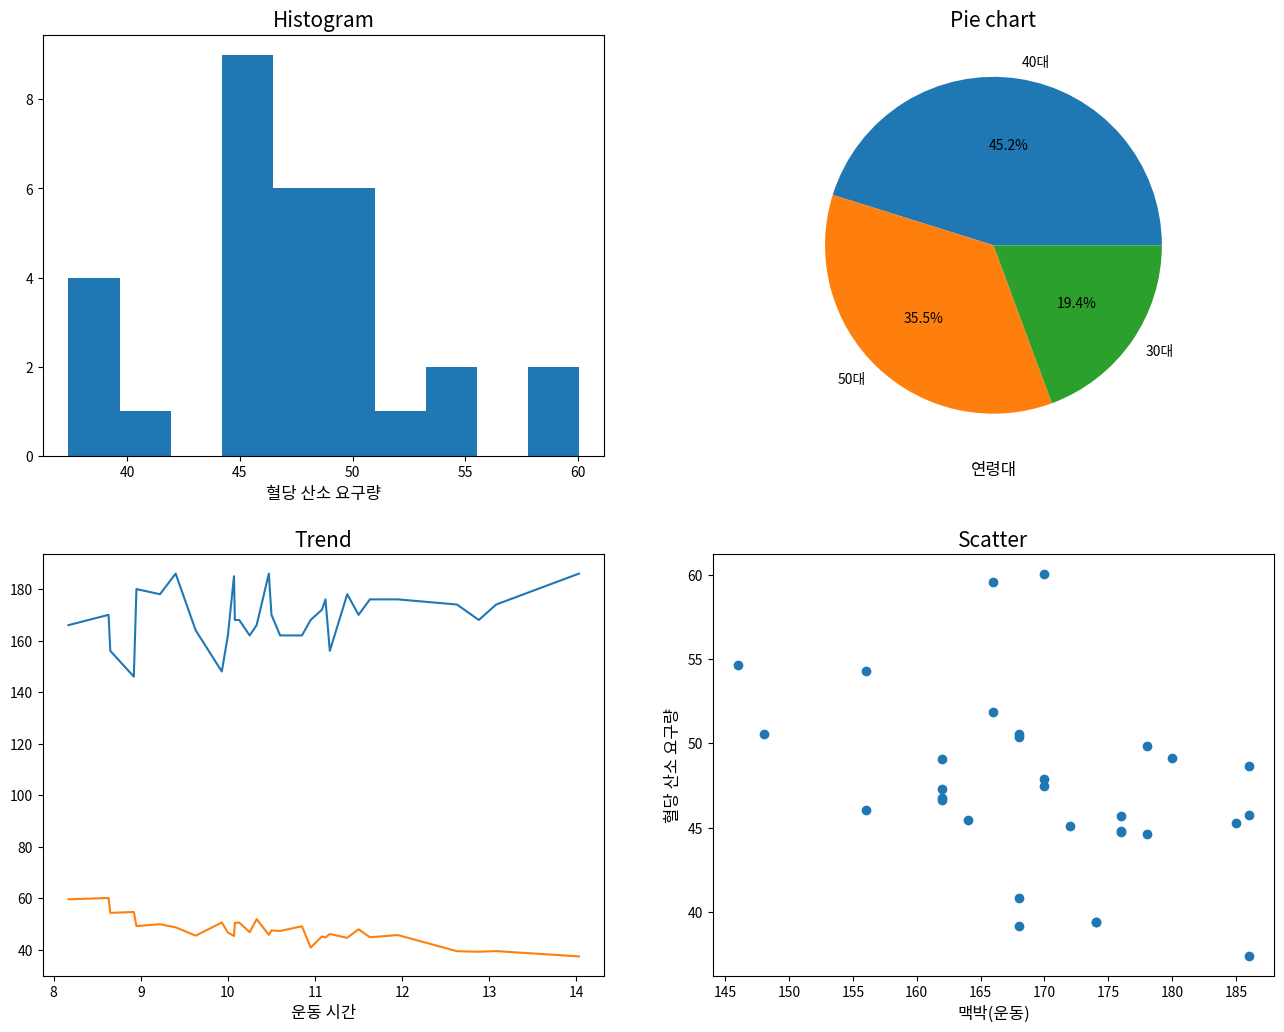

In [65]:
df_count=df_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
plt.tight_layout(w_pad=5,h_pad=5)

axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct="%.1f%%")
axes[0,1].set_title("Pie chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)

axes[1,0].plot("RUNTIME","RUNPULSE", data=df_fitness, label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY", data=df_fitness, label="혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize=15)
axes[1,0].set_xlabel("운동 시간", fontsize=12)
axes[1,0]


axes[1,1].scatter("RUNPULSE","OXY", data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)



In [66]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [67]:
mycars=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/mycars.csv", encoding='euc-kr')
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [68]:
mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [78]:
df=mycars[['model','mpg']]
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [80]:
QC1=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/EXH_QC1.csv", encoding='euc-kr')
df=QC1[['Flaws','Period']]

In [81]:
count=df['Flaws'].value_counts().sort_index()

In [83]:
cumcnt=np.cumsum(count)

In [84]:
percent= count/sum(count)*100

In [85]:
cumpct=np.cumsum(percent)

In [86]:
count_data=pd.DataFrame({'Count':count,'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0
